# INTRODUCTION

JFCNJJCS

### Data Preparation

In [133]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

In [134]:
txtdata="aluminium - dangerous if greater than 2.8 ammonia - dangerous if greater than 32.5 arsenic - dangerous if greater than 0.01 barium - dangerous if greater than 2 cadmium - dangerous if greater than 0.005chloramine - dangerous if greater than 4 chromium - dangerous if greater than 0.1 copper - dangerous if greater than 1.3 flouride - dangerous if greater than 1.5 bacteria - dangerous if greater than 0 viruses - dangerous if greater than 0 lead - dangerous if greater than 0.015 nitrates - dangerous if greater than 10 nitrites - dangerous if greater than 1 mercury - dangerous if greater than 0.002 perchlorate - dangerous if greater than 56 radium - dangerous if greater than 5 selenium - dangerous if greater than 0.5 silver - dangerous if greater than 0.1 uranium - dangerous if greater than 0.3 is_safe - class attribute {0 - not safe, 1 - safe} "

In [135]:
#print(txtdata)
#res = [float(i) for i in txtdata.split() if isinstance(i, float)]
import re
result = re.findall(r"[-+]?\d*\.\d+|\d+", txtdata)
print (result)

#print(str(res))

['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [136]:
Data=pd.read_csv('waterQuality1.csv')
Data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [137]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Notice that ammonia has inconsistent data. We need to correct the data and replace `#NUM!`

In [138]:
AmmoniaData=[]
for i in range(len(Data)):
    k=Data.loc[i,'ammonia']
    if k=='#NUM!':
        AmmoniaData+=[0]
    else:
        AmmoniaData+=[float(k)]
Data['ammonia']=AmmoniaData

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   float64
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [139]:
OriginalDataForLDA=Data.copy()
OriginalData=Data.copy()

In [140]:
indexNames = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == "#NUM!" ].index
#Delete these row indexes from dataFrame
OriginalDataForLDA.drop(indexNames , inplace=True)

In [141]:
OriginalDataForLDA.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

From here, we observe that the number of unsafe water compared to safe water is too big of a difference. We have to resample the data to get a more equal value

In [142]:
# separate safe and not safe data
data_0 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '0']
data_1 = OriginalDataForLDA[OriginalDataForLDA['is_safe'] == '1']

In [143]:
data_0 = data_0.sample(n=7084)

In [144]:
#put the issafe column together again
data_isSafe = data_1.append(data_0)
data_isSafe.is_safe.value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [145]:
u = data_isSafe.iloc[:, :-1]
v = data_isSafe.iloc[:, -1]

### Resampling

In [146]:
# import library
import imblearn
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
u_rus, v_rus = rus.fit_resample(u, v)

print('original dataset shape:', Counter(v))
print('Resample dataset shape', Counter(v_rus))

original dataset shape: Counter({'0': 7084, '1': 912})
Resample dataset shape Counter({'0': 912, '1': 912})


In [147]:
resampled=v_rus
resampled_variable=u_rus

In [148]:
resampled = resampled.to_frame(name="is_safe")

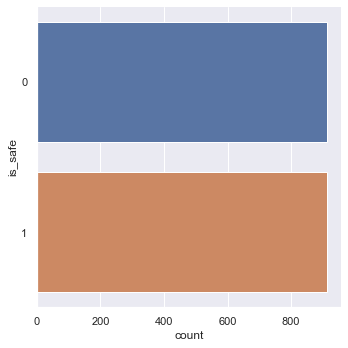

In [149]:
sb.catplot(y = 'is_safe', data = resampled, kind = "count")

The number of safe data and not safe data are now equal

In [150]:
# combine the data together again
OriginalDataForLDA=resampled_variable
OriginalDataForLDA["is_safe"]=resampled
OriginalDataForLDA

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,4.36,26.45,0.01,3.95,0.001,7.89,0.55,1.62,1.48,0.00,...,0.162,1.60,1.38,0.003,49.62,7.87,0.02,0.31,0.04,0
1,0.04,18.82,0.03,0.37,0.100,0.01,0.03,1.82,0.26,0.92,...,0.105,4.15,1.76,0.006,5.10,1.31,0.01,0.08,0.04,0
2,0.03,22.79,0.02,0.45,0.005,7.08,0.62,0.61,1.46,0.84,...,0.136,16.56,1.62,0.007,37.96,5.67,0.06,0.15,0.08,0
3,0.13,2.06,0.03,1.64,0.003,4.14,0.35,0.10,1.47,0.90,...,0.097,2.42,1.16,0.003,12.17,7.80,0.01,0.11,0.01,0
4,3.30,3.41,0.69,3.36,0.130,2.28,0.80,1.88,1.34,0.00,...,0.116,3.45,1.90,0.009,36.60,1.25,0.08,0.27,0.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
1820,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
1821,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
1822,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [151]:
DescribeFrame=Data.describe()
DescribeFrame

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


We encode the data accordingly to save levels of each components

In [152]:
ColList=list(Data.columns)
print(ColList)
MaxCount=DescribeFrame.iloc[7]
Max_list =MaxCount.tolist()
print(Max_list)
print (result)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']
[5.05, 29.84, 1.05, 4.94, 0.13, 8.68, 0.9, 2.0, 1.5, 1.0, 1.0, 0.2, 19.83, 2.93, 0.01, 60.01, 7.99, 0.1, 0.5, 0.09]
['2.8', '32.5', '0.01', '2', '0.005', '4', '0.1', '1.3', '1.5', '0', '0', '0.015', '10', '1', '0.002', '56', '5', '0.5', '0.1', '0.3', '0', '1']


In [153]:
for j in range (19):
    if float(Max_list[j])<=float(result[j]):
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), 100.00],
                           labels=['Safe', 'Dangerous'])
    else:
        OriginalDataForLDA[str(ColList[j]+'_bin')]= pd.cut(Data.iloc[:,j],
                           [-0.001, float(result[j]), float(Max_list[j])],
                           labels=['Safe', 'Dangerous'])

In [154]:
OriginalDataForLDA

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,bacteria_bin,viruses_bin,lead_bin,nitrates_bin,nitrites_bin,mercury_bin,perchlorate_bin,radium_bin,selenium_bin,silver_bin
0,4.36,26.45,0.01,3.95,0.001,7.89,0.55,1.62,1.48,0.00,...,Dangerous,Safe,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Safe,Dangerous
1,0.04,18.82,0.03,0.37,0.100,0.01,0.03,1.82,0.26,0.92,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
2,0.03,22.79,0.02,0.45,0.005,7.08,0.62,0.61,1.46,0.84,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Safe,Dangerous
3,0.13,2.06,0.03,1.64,0.003,4.14,0.35,0.10,1.47,0.90,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
4,3.30,3.41,0.69,3.36,0.130,2.28,0.80,1.88,1.34,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Dangerous
1820,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
1821,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,Dangerous,Dangerous,Dangerous,Safe,Dangerous,Dangerous,Safe,Safe,Safe,Dangerous
1822,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,Dangerous,Dangerous,Dangerous,Dangerous,Dangerous,Safe,Safe,Safe,Safe,Dangerous


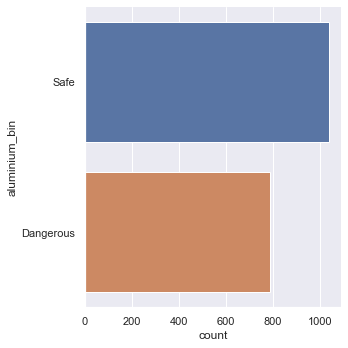

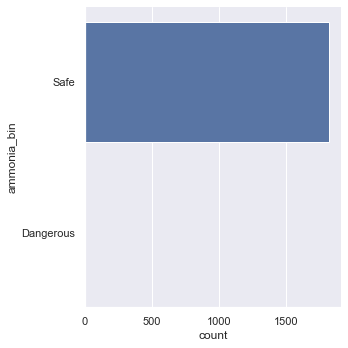

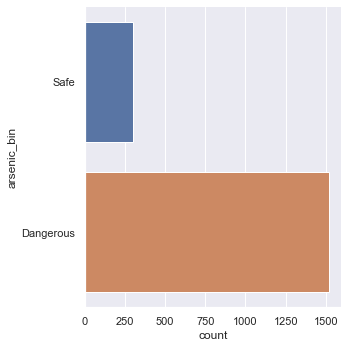

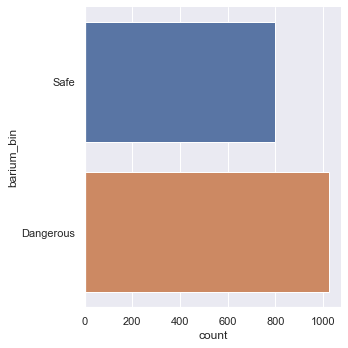

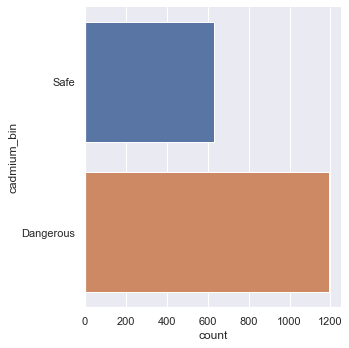

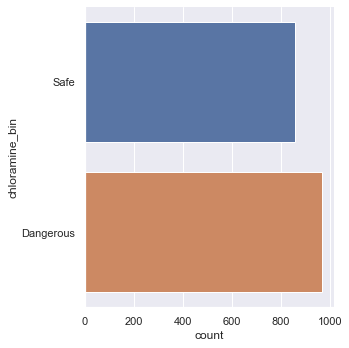

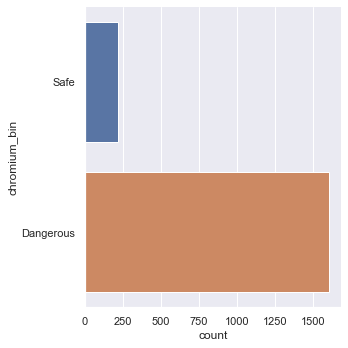

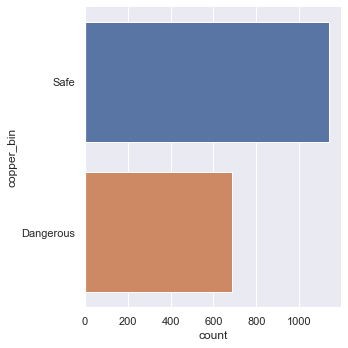

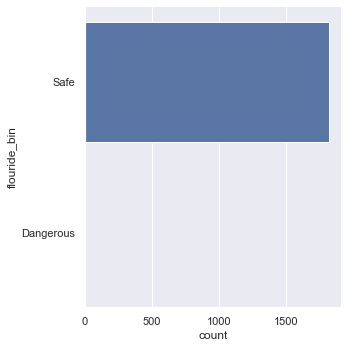

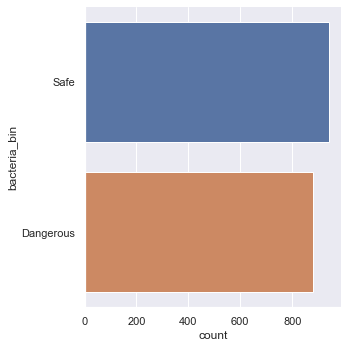

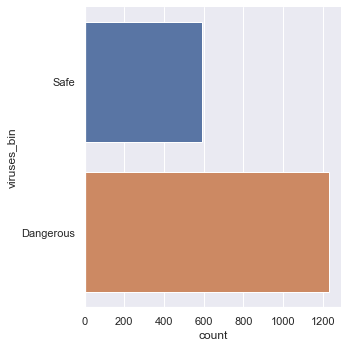

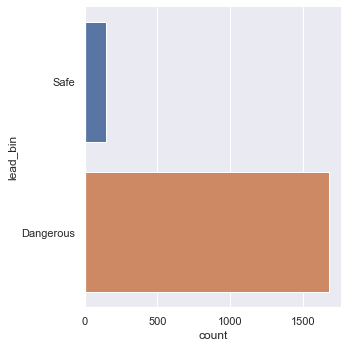

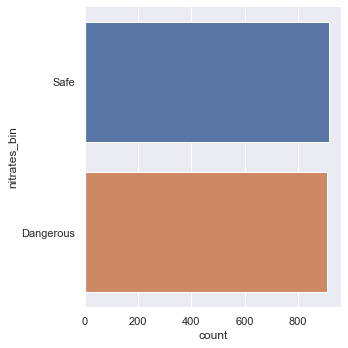

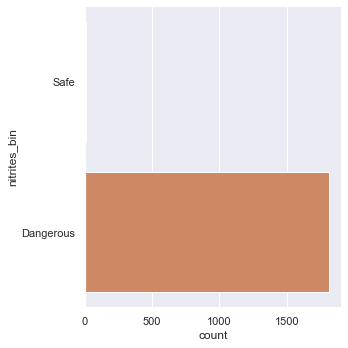

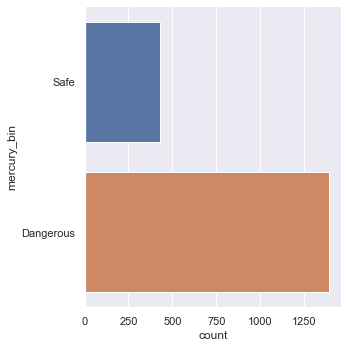

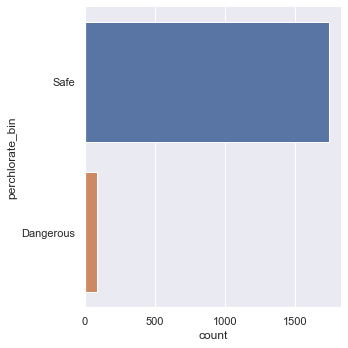

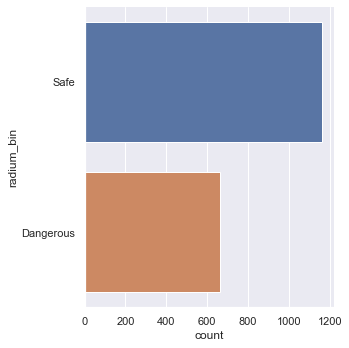

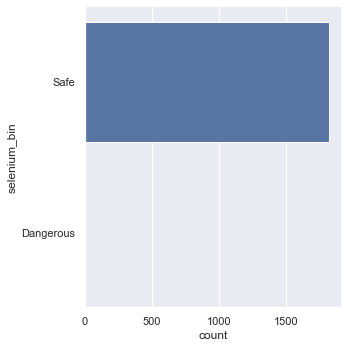

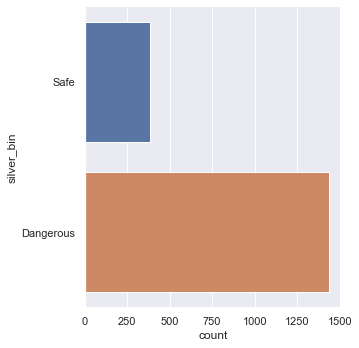

In [155]:
for y in OriginalDataForLDA.columns.values.tolist()[21:41]:
    sb.catplot(y = y, data = OriginalDataForLDA, kind = "count")

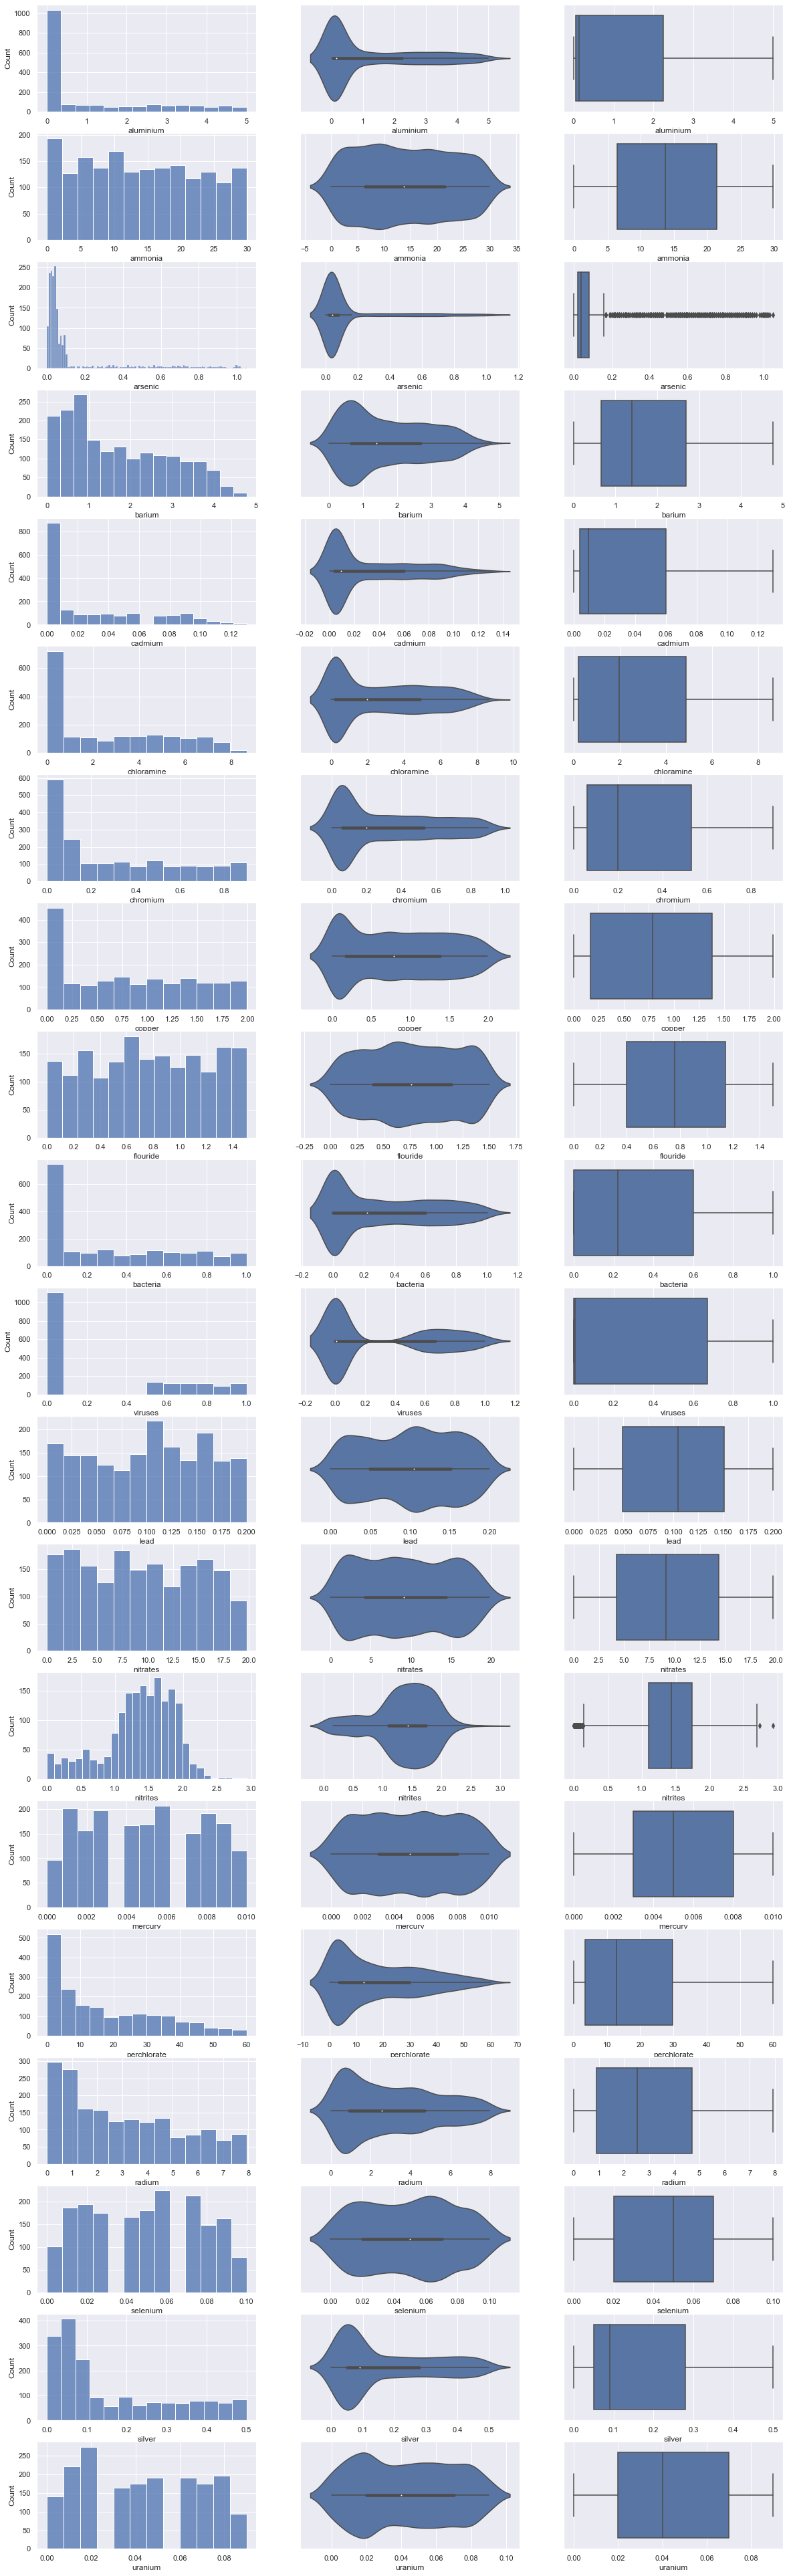

In [156]:
f, axes = plt.subplots(20, 3, figsize=(20, 70))
i=0
for y in OriginalDataForLDA.columns.values.tolist()[0:20]:
    
    sb.histplot(data = OriginalDataForLDA, x = y, ax=axes[i,0])
    sb.violinplot(data = OriginalDataForLDA,x=y, ax = axes[i,1])
    sb.boxplot(data = OriginalDataForLDA, x=y,orient = "h", ax = axes[i,2])
    i=i+1;

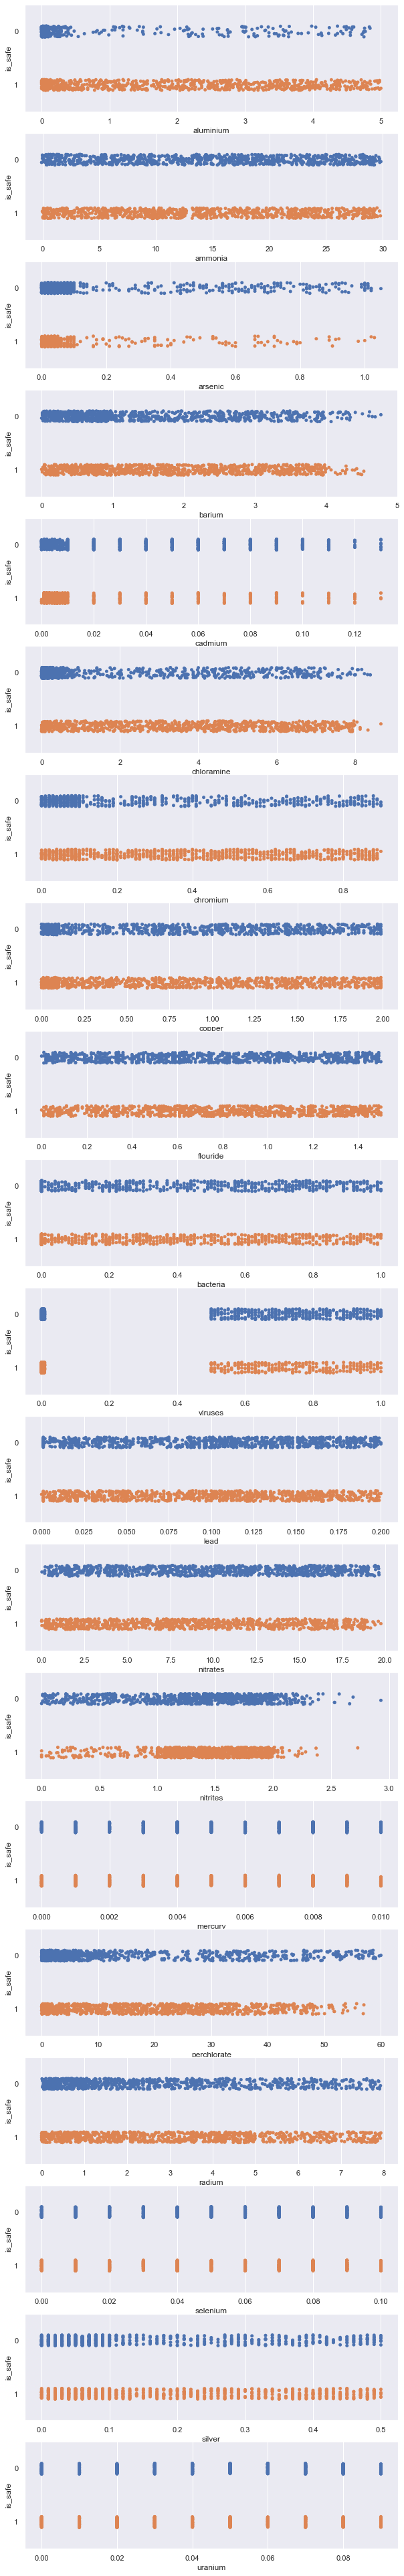

In [157]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.stripplot(x = j, y = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

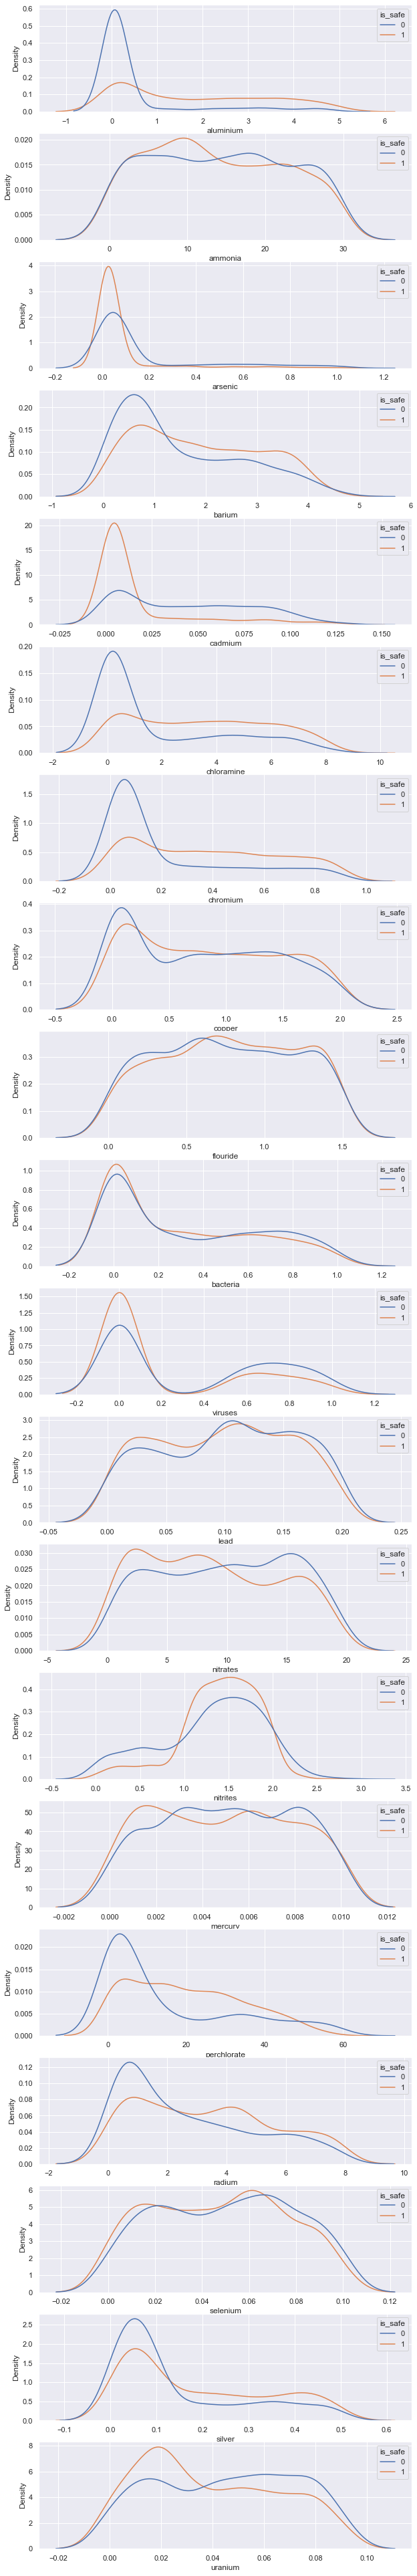

In [158]:
f, axes = plt.subplots(20, 1, figsize=(10, 70))
i=0
for j in OriginalDataForLDA.columns.values.tolist()[0:20]:
    sb.kdeplot(x = j, hue = 'is_safe', data = OriginalDataForLDA, ax=axes[i])
    i=i+1

### Random Forrest

In [159]:
# Extract Response and Predictors
y = pd.DataFrame(OriginalDataForLDA["is_safe"])
X = pd.DataFrame(OriginalDataForLDA. iloc[:, 0:19])

In [160]:
# necessary imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [162]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())
y_pred_train= clf.predict(X_train)
y_pred_test=clf.predict(X_test)

In [163]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [164]:
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Train Accuracy: 1.0


In [165]:
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy: 0.8969298245614035


In [166]:
from sklearn.metrics import confusion_matrix

In [167]:

print(confusion_matrix(y_test, y_pred_test))

[[177  23]
 [ 24 232]]


In [168]:
feature_names=OriginalDataForLDA.columns[0:19]

In [169]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

aluminium      0.196941
cadmium        0.116330
perchlorate    0.079226
arsenic        0.074341
silver         0.065278
chloramine     0.056229
chromium       0.054177
viruses        0.047568
nitrates       0.041286
nitrites       0.039463
ammonia        0.033305
copper         0.032358
lead           0.030422
bacteria       0.029630
radium         0.026949
barium         0.026267
flouride       0.020088
selenium       0.016658
mercury        0.013482
dtype: float64

No handles with labels found to put in legend.


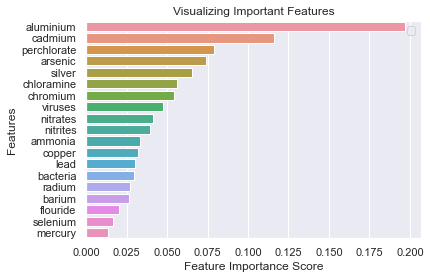

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Here shows each variable with the hightest importance score from the random forrest model. So we take the top 3 feature and test it again using the random forrest model.

In [171]:
estimator = clf.estimators_[5]

[Text(0.4937232905982906, 0.9666666666666667, 'X[4] <= 0.009\ngini = 0.499\nsamples = 872\nvalue = [711, 657]'),
 Text(0.2569444444444444, 0.9, 'X[0] <= 0.14\ngini = 0.353\nsamples = 423\nvalue = [150, 505]'),
 Text(0.15598290598290598, 0.8333333333333334, 'X[16] <= 4.8\ngini = 0.442\nsamples = 96\nvalue = [104, 51]'),
 Text(0.10683760683760683, 0.7666666666666667, 'X[18] <= 0.105\ngini = 0.489\nsamples = 71\nvalue = [66, 49]'),
 Text(0.05982905982905983, 0.7, 'X[6] <= 0.385\ngini = 0.493\nsamples = 44\nvalue = [33, 42]'),
 Text(0.05128205128205128, 0.6333333333333333, 'X[1] <= 11.025\ngini = 0.457\nsamples = 30\nvalue = [33, 18]'),
 Text(0.02564102564102564, 0.5666666666666667, 'X[5] <= 0.615\ngini = 0.483\nsamples = 11\nvalue = [9, 13]'),
 Text(0.017094017094017096, 0.5, 'X[13] <= 0.59\ngini = 0.459\nsamples = 7\nvalue = [9, 5]'),
 Text(0.008547008547008548, 0.43333333333333335, 'gini = 0.0\nsamples = 1\nvalue = [0, 4]'),
 Text(0.02564102564102564, 0.43333333333333335, 'X[15] <= 0.56

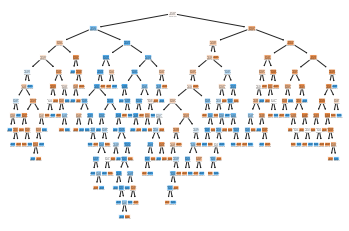

In [172]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
plot_tree(estimator, filled=True, rounded=True)